In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_colwidth=300

In [2]:
# Shingle generators 
# Arguments : Message string, shingle size {in words}
# Returns : All shingles formed with k words
def shingle_generator(message, k):
    message = message.split(' ')
    item_set = []
    for i in range(0, len(message)-k):
        shingle =  ""
        for j in range(0, k):
            shingle = shingle + message[i+j] + " "
        item_set.append(shingle)
    return item_set

In [3]:
def jaccard_similarity(str1, str2):
    string_set1 = set(str1.split(' '))
    string_set2 = set(str2.split(' '))
    return len(string_set1.intersection(string_set2))/len(string_set2.union(string_set1))

In [4]:
# dump pkl into a pandas dataframe. 
data = pd.read_pickle('data/string_study.pkl')

In [5]:
data["word_count"] = data._info.apply(lambda x:len(x.split(' ')))
# data.head(7)

In [6]:
msg_array = np.array(data._info.copy())
# msg_array

In [7]:
class_by_len_set = set(data.word_count)

In [8]:
# class_by_len_set

In [9]:
# Taking the smallest one to test minhash algo
len(data.query("word_count == 21"))

47

In [10]:
filtered_data = data.query("word_count == 21")
# filtered_data.head(47)


In [11]:
set(np.array(filtered_data.msg))

{'Build of instance xyz aborted: Service Unavailable (HTTP 503)',
 'Connection to the hypervisor is broken on host: xyz.cern.ch',
 'Script execution failed: Error running command {"interpreter": "/bin/sh", "script_inline": "ping -c ',
 'The server is currently unavailable. Please try again at a later time.<br /><br />    (HTTP 503) (Re',
 'Unable to establish connection to https:some_url (\\\'Connection aborted.\\\', BadStatusLine("\\\'\\\'",))'}

In [12]:
msg_array = np.array(filtered_data._info.copy())
jaccard_sim_set = []
jaccard_matrix = [[0 for i in range(len(msg_array))] for j in range(len(msg_array))]
for i in range(0, len(msg_array)):
    jaccard_matrix[i][i] = 1
    for j in range(i+1, len(msg_array)):
        jaccard_sim = jaccard_similarity(msg_array[i], msg_array[j])
        jaccard_sim_set.append(jaccard_sim)
        jaccard_matrix[i][j] = jaccard_sim
        jaccard_matrix[j][i] = jaccard_sim
set(jaccard_sim_set)

{0.0,
 0.02564102564102564,
 0.027777777777777776,
 0.3125,
 0.3225806451612903,
 0.36666666666666664,
 0.7391304347826086,
 0.75,
 0.8181818181818182,
 1.0}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1207d0748>]],
      dtype=object)

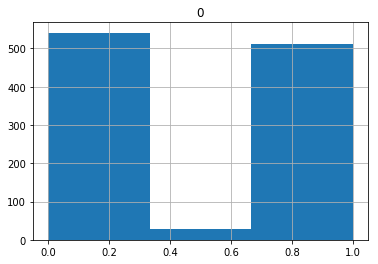

In [13]:
jaccard_dataframe = pd.DataFrame(jaccard_sim_set)
jaccard_dataframe.hist(bins = 3)

In [14]:
raw_msgs = filtered_data._info

In [55]:
# quer_str = "_info == " + raw_msgs.iloc[1]
# filtered_data.query(str)
data.iloc[27825]

atime                                                                                                                                                                                                                                                                                                       1522919580867
task                                                                                                                                                                                                                                                                                                         reboot-linux
deployment                                                                                                                                                                                                                                                                                                             qa
raw           2018-04-05 11:13:00.867 25397 ERROR rallytes

In [35]:
# raw_msgs

In [36]:
# raw_msgs = pd.DataFrame(raw_msgs, columns=["_info"])

In [37]:
# Generate the set of words of all raw messages
message_set = []
# %time

for item in np.array(raw_msgs):
#     print(item)
    item = str(item)
    set_of_words = set(item.split(' '))
    # Shingle size is set to 3 words
    set_of_words = set(shingle_generator(item, 2))
    message_set.append(set_of_words)


In [38]:
import numpy as np
import csv
import pandas
from datasketch import MinHash, MinHashLSH

In [39]:
# Generate MinHash instances for all messages
m = []
for i in range (0, len(message_set)):
    m_temp = MinHash(num_perm=128)
    m.append(m_temp)
len(m)

47

In [40]:
i = 0
for message in message_set:
    for word in message:
        m[i].update(word.encode('utf-8'))
    i = i + 1

In [42]:
# Create an LSH indexb
# %time
lsh = MinHashLSH(threshold=.35, num_perm=128)
count = 0
# for i in range (0, len(m)):
for index, row in filtered_data.iterrows():
    string = "m" + str(index)
    lsh.insert(string, m[count])
    count += 1
print (count)

47


In [43]:
# Find all the messages similar to the fist message with a specified threshold
%time
result = lsh.query(m[0])
# (result)

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 8.82 µs


In [47]:
# Repeat the clustering proc for every message. 
clusters = {}
cluster_count = 1
# For every message add the result to the cluster
for i in range(0, len(m)):
    # check if the message belongs to any cluster
    msg_str = "m" + str(i)
    flag = 1
    for item in clusters.values():
        if msg_str in item:
            flag = 0
            break
    # End of check box
    if flag:
        result = lsh.query(m[i])
        clusters[cluster_count] = result
        cluster_count += 1

In [48]:
clusters

{1: ['m27914',
  'm27953',
  'm28665',
  'm28025',
  'm28341',
  'm28010',
  'm32047',
  'm9162',
  'm27762',
  'm27306',
  'm28664',
  'm28149',
  'm27907',
  'm28478',
  'm27881',
  'm27787',
  'm27825',
  'm27339',
  'm27399',
  'm27915',
  'm27690',
  'm28657',
  'm27453',
  'm27582',
  'm28146',
  'm27354',
  'm28400',
  'm30694',
  'm28350'],
 2: ['m20215'],
 3: ['m27914',
  'm27953',
  'm28665',
  'm33136',
  'm28025',
  'm28341',
  'm28010',
  'm32047',
  'm9162',
  'm27762',
  'm27306',
  'm28664',
  'm28149',
  'm27907',
  'm27787',
  'm27881',
  'm28478',
  'm27825',
  'm27339',
  'm27399',
  'm27915',
  'm27690',
  'm28657',
  'm27453',
  'm27582',
  'm28146',
  'm27354',
  'm28400',
  'm30694',
  'm28350'],
 4: ['m27914',
  'm27953',
  'm28665',
  'm33136',
  'm28025',
  'm28341',
  'm28010',
  'm32047',
  'm9162',
  'm27762',
  'm27306',
  'm28664',
  'm28149',
  'm27907',
  'm27787',
  'm27881',
  'm28478',
  'm27825',
  'm27339',
  'm27399',
  'm27915',
  'm27690',
  'm